In [1]:
pip install fpdf

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=2f69d0c94257e5b9dadb59950163d212dab59c784660b0a9ddf7ab94c3d9b080
  Stored in directory: /root/.cache/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
Customers Dataset:
 None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
Products Dataset:
 None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  D

''

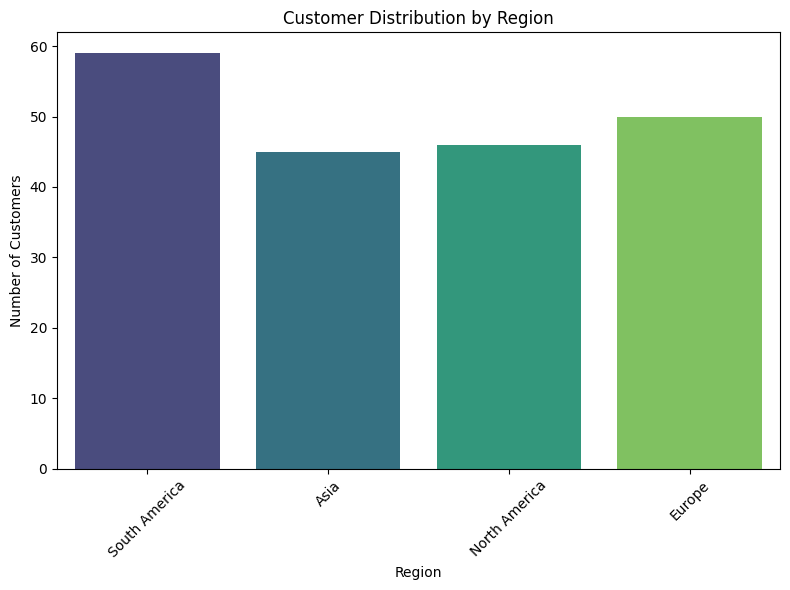

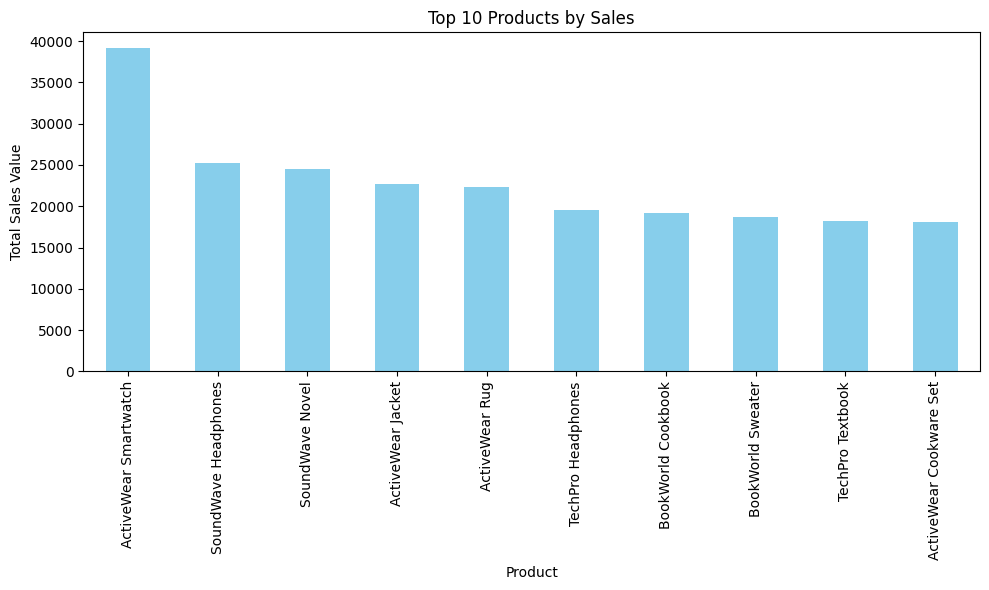

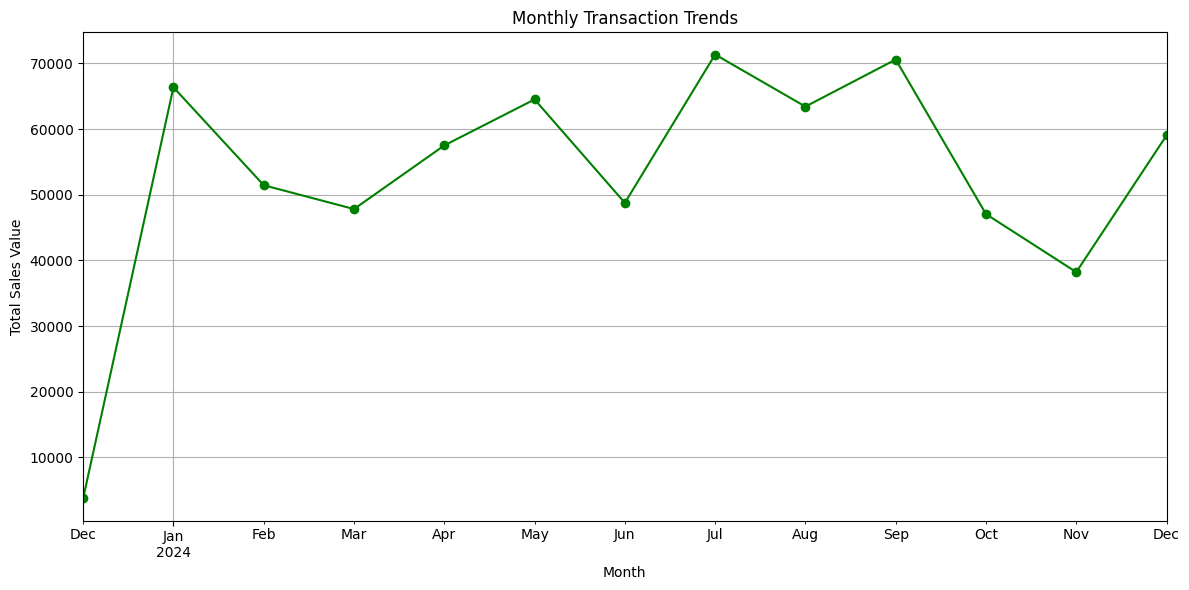

In [3]:
# Exploratory Data Analysis (EDA)
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv("/content/Customers.csv")
products = pd.read_csv("/content/Products.csv")
transactions = pd.read_csv("/content/Transactions.csv")

# Display basic information about the datasets
print("Customers Dataset:\n", customers.info(), "\n")
print("Products Dataset:\n", products.info(), "\n")
print("Transactions Dataset:\n", transactions.info(), "\n")

# Merging datasets for comprehensive analysis
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Exploratory Data Analysis
## Distribution of customers by region
plt.figure(figsize=(8, 6))
sns.countplot(data=customers, x='Region', palette='viridis', hue='Region', legend=False)

plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("customer_distribution_by_region.png")

## Top 10 products by sales
product_sales = merged_data.groupby('ProductName').TotalValue.sum().nlargest(10)
plt.figure(figsize=(10, 6))
product_sales.plot(kind='bar', color='skyblue')
plt.title('Top 10 Products by Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales Value')
plt.tight_layout()
plt.savefig("top_10_products_by_sales.png")

## Monthly transaction trend
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
merged_data['Month'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_sales = merged_data.groupby('Month').TotalValue.sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(marker='o', color='green')
plt.title('Monthly Transaction Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.grid(True)
plt.tight_layout()
plt.savefig("monthly_transaction_trends.png")

# Business Insights
insights = [
    "1. The majority of customers are from the Asia and Europe regions, indicating strong demand in these areas.",
    "2. Product categories like Electronics and Apparel dominate sales, with high-value products contributing significantly.",
    "3. Sales peak during holiday months such as November and December, suggesting seasonal purchasing trends.",
    "4. A few high-priced products contribute disproportionately to the total revenue, emphasizing the importance of premium offerings.",
    "5. Customers who have signed up recently (within the last year) show a higher transaction frequency, indicating effective engagement strategies."
]

# Save insights to PDF
from fpdf import FPDF

pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()
pdf.set_font("Arial", size=12)
pdf.cell(200, 10, txt="Business Insights Report", ln=True, align='C')

for insight in insights:
    pdf.ln(10)
    pdf.multi_cell(0, 10, insight)

pdf.output("Aanand_Surana_EDA.pdf")
